In [ ]:
import os
from os.path import join as oj
import sys, time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import data_pecarn
import data_psrc
import data
import matplotlib.gridspec as grd
import viz
import style
import util
from style import *
from data import feats_numerical, feats_categorical, meta, outcome_def
outcome_def = 'iai_intervention' # output
%matplotlib inline
%load_ext autoreload
%autoreload 2

# combined

In [2]:
df_pecarn, df_psrc, common_feats, filtered_feats_pecarn, filtered_feats_psrc = data.load_it_all(dummy=True)
df = df_pecarn[common_feats].append(df_psrc[common_feats])
processed_feats = data.select_final_feats(common_feats)
# df_pecarn = df_pecarn[df_pecarn.cv_fold.isin(data.pecarn_train_idxs)]
# df_psrc = df_psrc[df_psrc.cv_fold.isin(data.psrc_train_idxs)]

/accounts/projects/vision/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


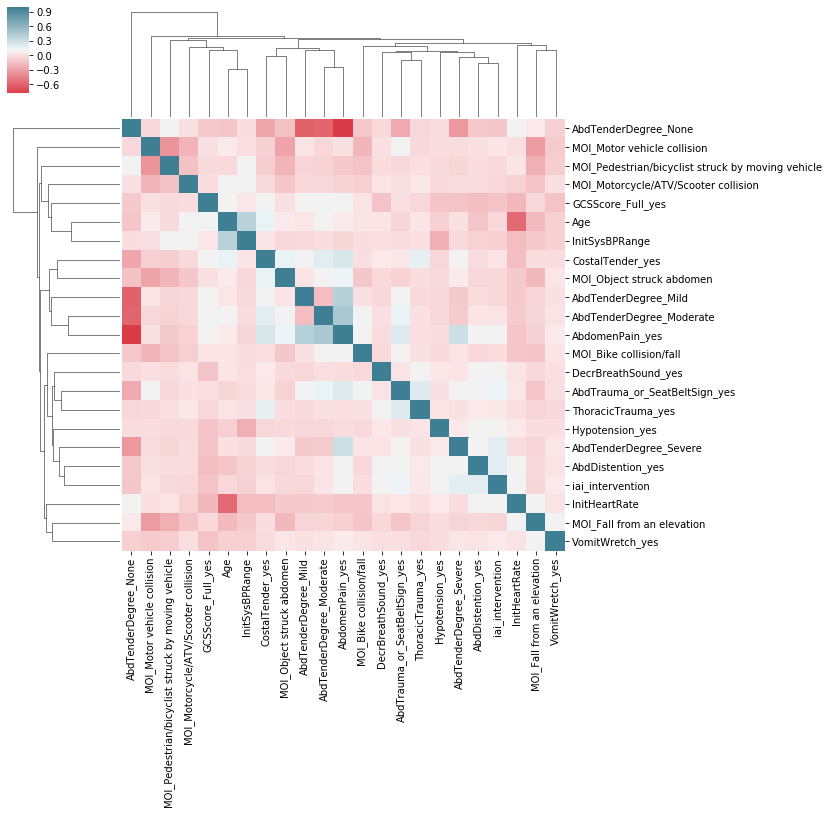

In [3]:
# corrs = df[feat_names + [outcome_def]].corr()
corrs = df[processed_feats + [outcome_def]].corr(method='spearman')
sns.clustermap(corrs, cmap=style.cmap_div)
# plt.savefig('results/corrplot.png', dpi=300, bbox_inches='tight')

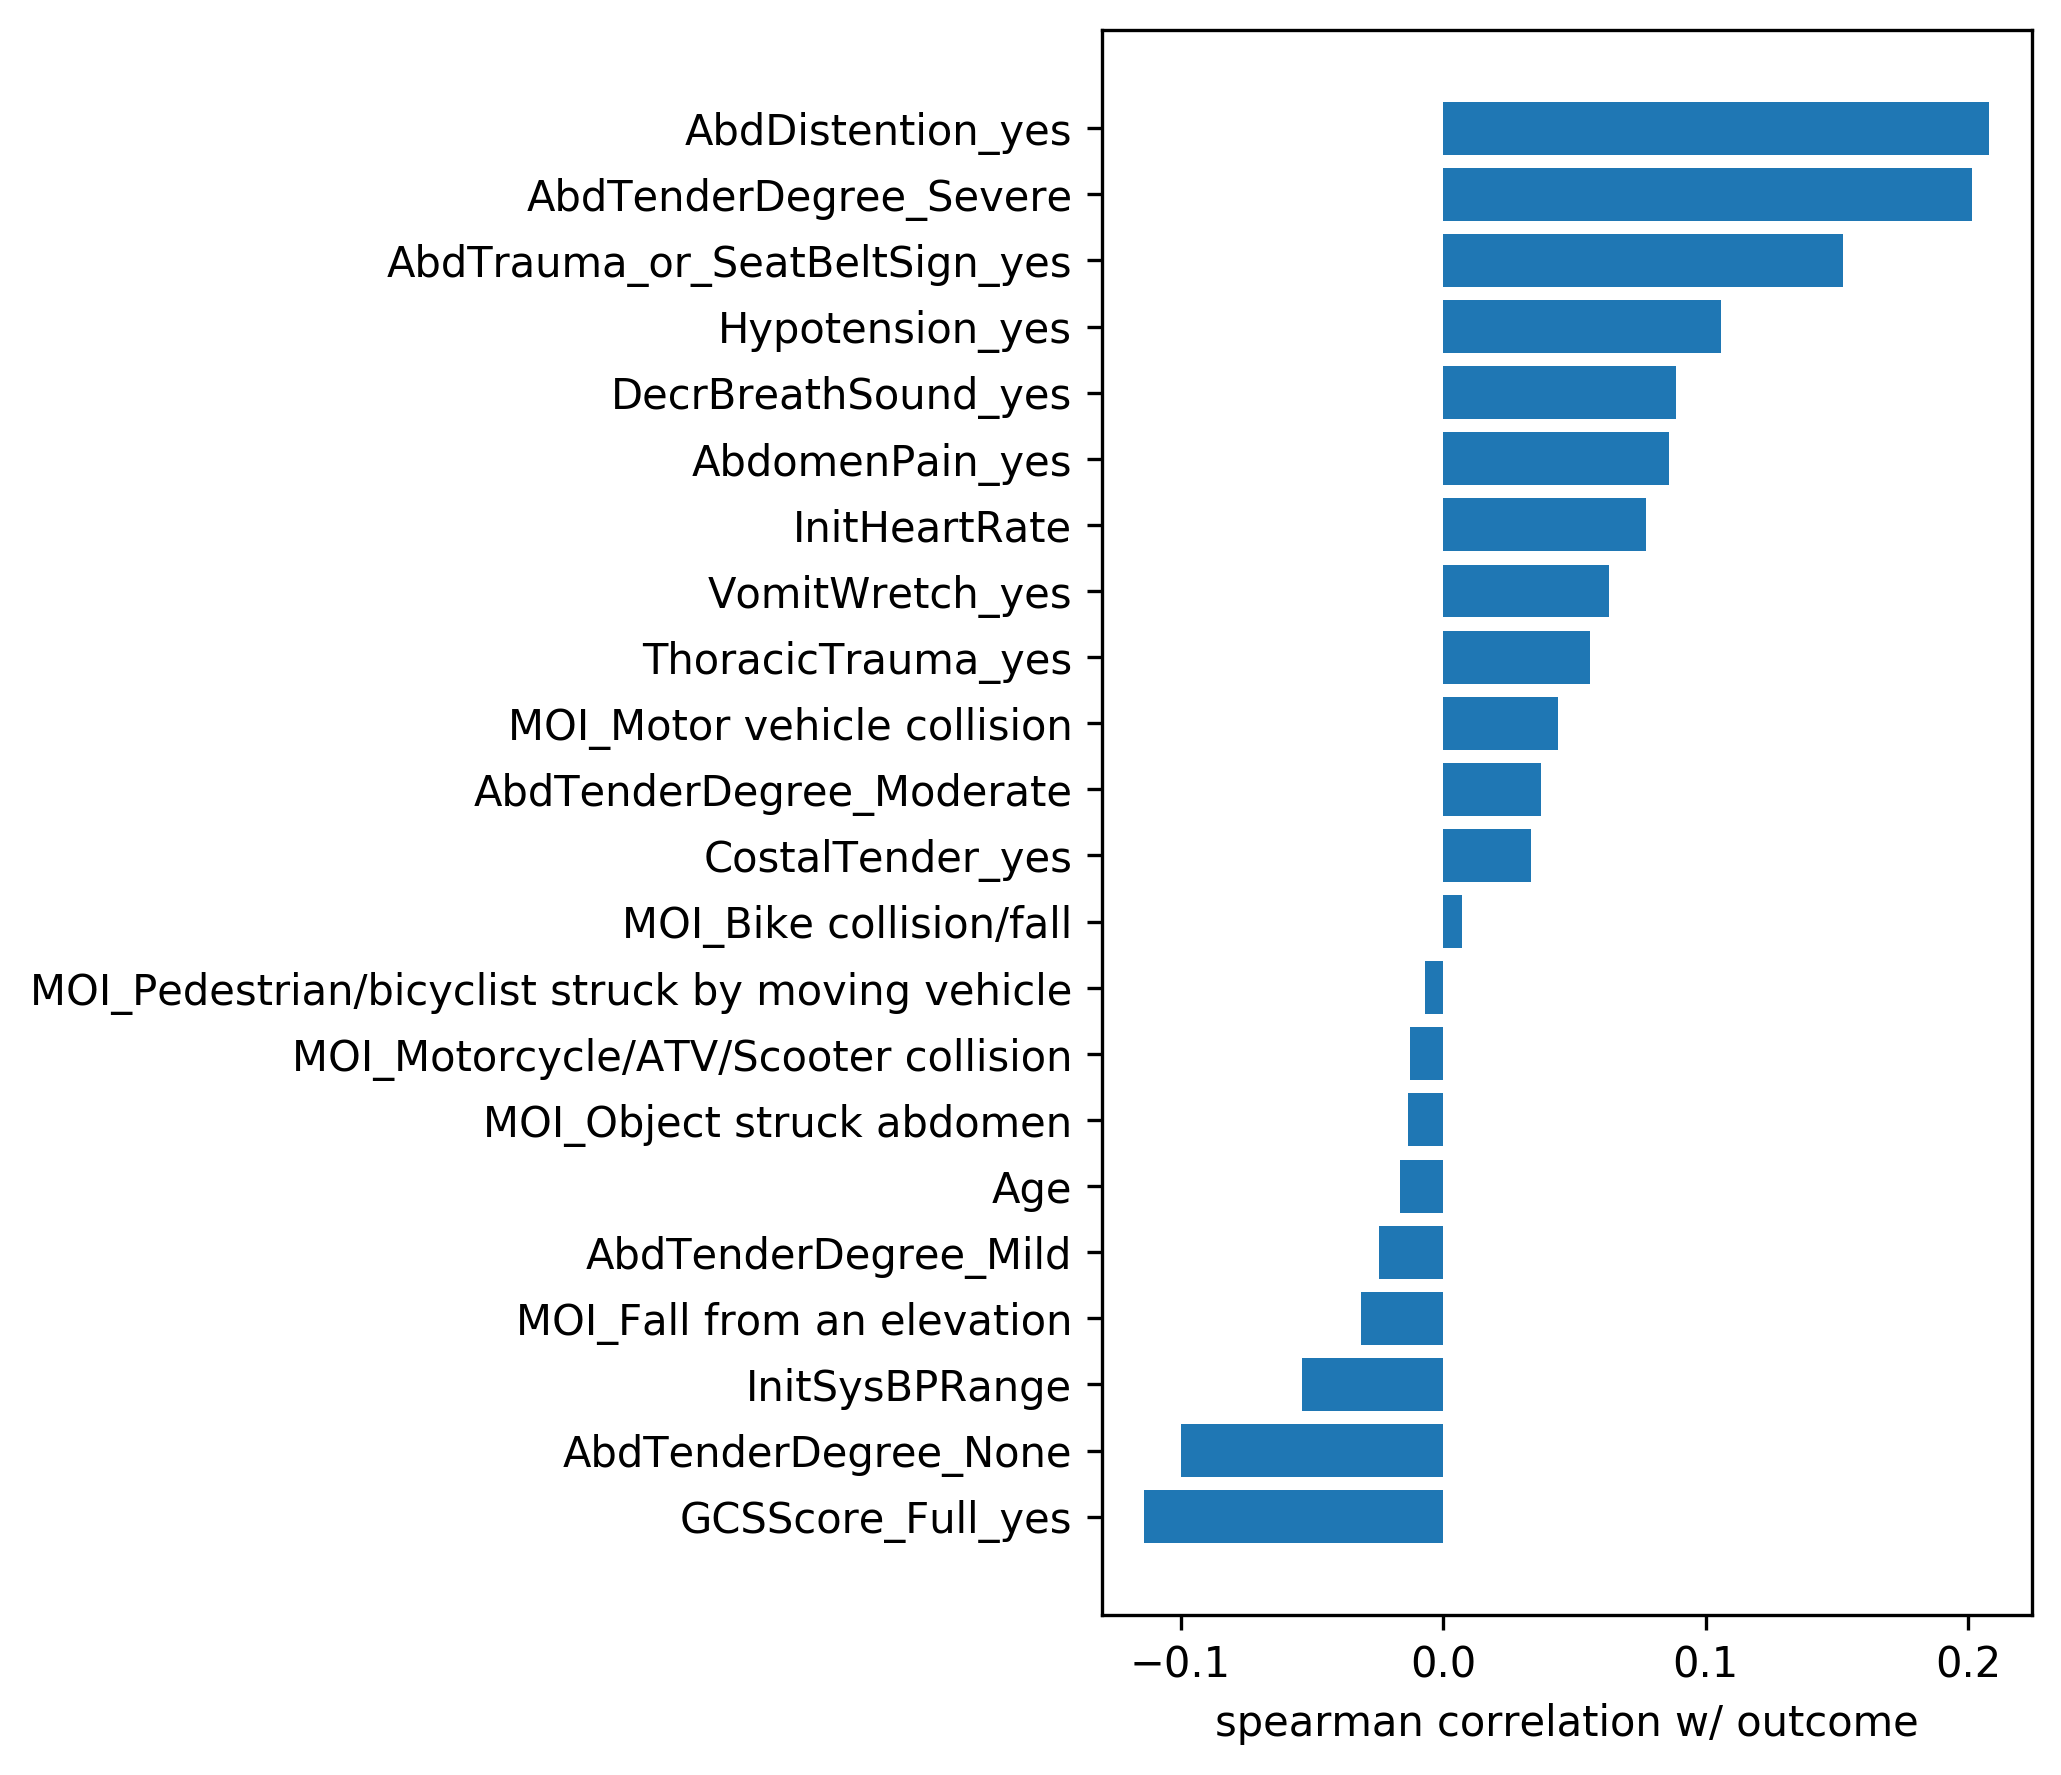

In [4]:
plt.figure(dpi=300, figsize=(4, 7))
vals = corrs[outcome_def]
args = np.argsort(vals)
labs = corrs['iai_intervention'][args].index.values
plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('spearman correlation w/ outcome')
plt.show()

# features scatter plots

## continuous features

In [ ]:
R, C, = 1, 4
plt.figure(figsize=(12, 3), dpi=500)
for i in range(len(data.feats_numerical)):
    plt.subplot(R, C, i + 1)
    feat = data.feats_numerical[i]
    plt.hist(df[df[outcome_def] == 1][feat], density=True, alpha=1, label='pos', color=cb)
    plt.hist(df[df[outcome_def] == 0][feat], density=True, alpha=0.5, label='neg', color=cr)
    plt.xlabel(feat, fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**we can cut GCSScore as whether it is 15 or not (14 is already pretty bad)**

In [6]:
feat = 'GCSScore'
print(np.unique(df[df[outcome_def] == 1][feat], return_counts=True))
print(np.unique(df[df[outcome_def] == 0][feat], return_counts=True))

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]), array([ 40,   2,   3,   6,  10,   4,  10,   7,   1,   1,   9,  25, 147]))
(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]), array([  303,    40,    37,    82,    80,    57,    80,    75,    76,
         108,   283,   743, 12003]))


# scatter plots

In [ ]:
viz.jointplot_grouped('Age', 'InitSysBPRange', 'iai_intervention', df)

In [8]:
# viz.jointplot_grouped('Age', 'AbdDistention_yes', 'iai_intervention', df)

In [ ]:
viz.jointplot_grouped('InitSysBPRange', 'InitHeartRate', 'iai_intervention', df)

In [ ]:
viz.jointplot_grouped('Age', 'Hypotension_yes', 'iai_intervention', df)

In [ ]:
viz.jointplot_grouped('Age', 'Sex_M', 'iai_intervention', df_pecarn) # this is using the df that still has gender